In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from sklearn.model_selection import train_test_split
# from sklearn.preprocessing import StandardScaler
import lightgbm as lgb
from sklearn.metrics import accuracy_score

pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns', 500)

In [2]:
train = pd.read_csv('Data/train_yaOffsB.csv')
test = pd.read_csv('Data/test_pFkWwen.csv')
ss = pd.read_csv('Data/sample_submission_O1oDc4H.csv')

In [3]:
train.head(10)

,ID,Estimated_Insects_Count,Crop_Type,Soil_Type,Pesticide_Use_Category,Number_Doses_Week,Number_Weeks_Used,Number_Weeks_Quit,Season,Crop_Damage
0,F00000001,188,1,0,1,0,0.0,0,1,0
1,F00000003,209,1,0,1,0,0.0,0,2,1
2,F00000004,257,1,0,1,0,0.0,0,2,1
3,F00000005,257,1,1,1,0,0.0,0,2,1
4,F00000006,342,1,0,1,0,0.0,0,2,1
5,F00000008,448,0,1,1,0,NaN,0,2,1
6,F00000009,448,0,1,1,0,NaN,0,2,1
7,F00000010,577,1,0,1,0,0.0,0,1,2
8,F00000012,731,0,0,1,0,0.0,0,2,0
9,F00000020,1132,1,0,1,0,0.0,0,1,2


In [4]:
train.isnull().sum()

ID                            0
Estimated_Insects_Count       0
Crop_Type                     0
Soil_Type                     0
Pesticide_Use_Category        0
Number_Doses_Week             0
Number_Weeks_Used          9000
Number_Weeks_Quit             0
Season                        0
Crop_Damage                   0
dtype: int64

In [5]:
test.head(10)

,ID,Estimated_Insects_Count,Crop_Type,Soil_Type,Pesticide_Use_Category,Number_Doses_Week,Number_Weeks_Used,Number_Weeks_Quit,Season
0,F00000002,188,1,1,1,0,NaN,0,2
1,F00000007,410,1,1,1,0,0.0,0,2
2,F00000011,626,1,0,1,0,0.0,0,2
3,F00000013,731,1,0,1,0,0.0,0,2
4,F00000014,789,0,0,1,0,0.0,0,1
5,F00000015,851,0,1,1,0,0.0,0,2
6,F00000016,851,1,0,1,0,NaN,0,3
7,F00000019,1056,1,0,1,0,0.0,0,1
8,F00000025,1576,1,0,1,0,0.0,0,2
9,F00000026,1576,1,0,1,0,0.0,0,1


In [6]:
test.isnull().sum()

ID                            0
Estimated_Insects_Count       0
Crop_Type                     0
Soil_Type                     0
Pesticide_Use_Category        0
Number_Doses_Week             0
Number_Weeks_Used          5893
Number_Weeks_Quit             0
Season                        0
dtype: int64

In [7]:
ss.head(10)

,ID,Crop_Damage
0,F00000002,1
1,F00000011,1
2,F00000014,1
3,F00000015,1
4,F00000016,1
5,F00000019,1
6,F00000025,1
7,F00000031,1
8,F00000032,1
9,F00000033,1


In [8]:
# train['total_doses'] = (train['Number_Doses_Week'] * train['Number_Weeks_Used'])
# train['quit_used'] = (train['Number_Weeks_Quit'] * train['Number_Weeks_Used'])
# train['doeses_quit'] = (train['Number_Doses_Week'] * train['Number_Weeks_Quit'])

# test['total_doses'] = (test['Number_Doses_Week'] * test['Number_Weeks_Used'])
# test['quit_used'] = (test['Number_Weeks_Quit'] * test['Number_Weeks_Used'])
# test['doeses_quit'] = (test['Number_Doses_Week'] * test['Number_Weeks_Quit'])

In [9]:
# features = ['Estimated_Insects_Count', 'Crop_Type', 'Soil_Type',
#        'Pesticide_Use_Category', 'Number_Doses_Week', 'Number_Weeks_Used',
#        'Number_Weeks_Quit', 'Season', 'total_doses',
#        'quit_used', 'doeses_quit']
features = ['Estimated_Insects_Count', 'Crop_Type', 'Soil_Type',
       'Pesticide_Use_Category', 'Number_Doses_Week', 'Number_Weeks_Used',
       'Number_Weeks_Quit', 'Season']

In [10]:
X, y = train[features], train[['Crop_Damage']]

In [11]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.3, random_state=1)

In [12]:
# sc = StandardScaler()
# X_train=pd.DataFrame(sc.fit_transform(X_train))
# X_val = sc.transform(X_val)

In [13]:
#Converting the dataset in proper LGB format
d_train=lgb.Dataset(X_train, label=y_train)

#setting up the parameters
params={}
params['learning_rate']=0.03
params['boosting_type']='gbdt' #GradientBoostingDecisionTree
params['objective']='multiclass' #Multi-class target feature
params['metric']='multi_logloss' #metric for multi-class
params['max_depth']=30
params['num_class']=3 #no.of unique values in the target class not inclusive of the end value
# params["subsample"] = 0.8
params["min_child_weight"] = 30
# params["colsample_bytree"] = 0.7
params["max_depth"] = 6
# params["silent"] = 1
# params["seed"] = seed_val


#training the model
clf=lgb.train(params,d_train,700)  #training the model on 100 epocs
#prediction on the test dataset
y_val_pred=clf.predict(X_val)

# 0.8465001125365744

In [14]:
y_val_pred = [np.argmax(line) for line in y_val_pred]
accuracy_score(y_val_pred, y_val)

0.8465001125365744

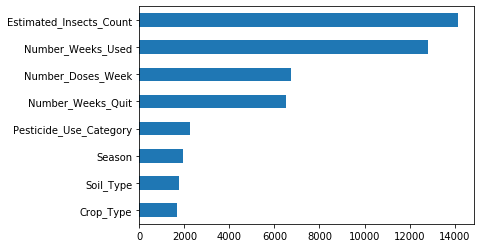

In [15]:
fi = pd.Series(index = features, data = clf.feature_importance())
fi.sort_values(ascending=False)[0:30][::-1].plot(kind = 'barh')

In [16]:
X

,Estimated_Insects_Count,Crop_Type,Soil_Type,Pesticide_Use_Category,Number_Doses_Week,Number_Weeks_Used,Number_Weeks_Quit,Season
0,188,1,0,1,0,0.0,0,1
1,209,1,0,1,0,0.0,0,2
2,257,1,0,1,0,0.0,0,2
3,257,1,1,1,0,0.0,0,2
4,342,1,0,1,0,0.0,0,2
...,...,...,...,...,...,...,...,...
88853,3337,1,0,2,10,12.0,44,3
88854,3516,1,0,2,10,20.0,38,1
88855,3516,1,0,2,15,40.0,8,2
88856,3702,1,0,2,10,25.0,18,3


In [17]:
# sc_1 = StandardScaler()
# X=pd.DataFrame(sc_1.fit_transform(X))
# X_test = sc_1.transform(test[features])

In [18]:
#Converting the dataset in proper LGB format
d_train=lgb.Dataset(X, label=y)

#setting up the parameters
params['learning_rate']=0.03
params['boosting_type']='gbdt' #GradientBoostingDecisionTree
params['objective']='multiclass' #Multi-class target feature
params['metric']='multi_logloss' #metric for multi-class
params['max_depth']=30
params['num_class']=3 #no.of unique values in the target class not inclusive of the end value
# params["subsample"] = 0.8
params["min_child_weight"] = 30
# params["colsample_bytree"] = 0.7
params["max_depth"] = 6
# params["silent"] = 1
# params["seed"] = seed_val
#training the model
clf=lgb.train(params,d_train,750)  #training the model on 100 epocs
#prediction on the test dataset


In [19]:
y_pred=clf.predict(test[features])
y_pred = [np.argmax(line) for line in y_pred]

In [20]:
test['Crop_Damage'] = y_pred
test['Crop_Damage'].value_counts()

0    56263
1     3045
2        2
Name: Crop_Damage, dtype: int64

In [21]:
ss = ss[['ID']].merge(test[['ID', 'Crop_Damage']], on='ID')

In [22]:
ss.to_csv("soln.csv", index=False)